## Bangalore dataset exploration:

## Handling NULL values :


#### Loading the dataset

In [1]:
import pandas as pd

In [2]:
def display_all(df):
  with pd.option_context('display.max_rows', None):
    display(df)

In [3]:
df= pd.read_csv("datasets/Bengaluru_House_Data.csv")
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Bengaluru_House_Data.csv'

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

### Purpose of cleaning data
- Find the null values
- Fill in the null values
    - Delete the NULL values (if very few data points are NULL)
    - Replace the NULL values with relevent values (lots of data points have NULL)
    - Create new columns (if required)
- Change/Replace some specific column values
- Handling outliers

In [ ]:
df[df['society'].isnull()]

In [ ]:
df['society'].value_counts()

In [ ]:
df['balcony']=df['balcony'].fillna(df['balcony'].median())

In [ ]:
df.head(10)

In [ ]:
df['society']=df['society'].fillna("Jaades")
df

In [ ]:
df['society'].replace('Jaades','test',inplace=True)

In [ ]:
df

## Salary datasheet Analysis

Learning Goals :

    - Load the dataset~
    - Get a view of the dataset~
    - change the column names for readability~
    - size/shape of the dataset~
    
- check the missing/null values in the dataset~
- drop columns (if too many missing column values)~
- replace the null values with relevant values~
- drop the missing values all together
- handle outliers

## Load the dataset and view it

##### First task is to read a dataset...In here , we are using the pima diabetes dataset. We read the dataset from the datasets folder and view the data.

In [ ]:
import pandas as pd 

In [ ]:
pima=pd.read_csv("datasets/Ask A Manager Salary Survey.csv")
pima.head()

## Change column names for readability

##### Before going into analysis, here we see that the columns names are too large . In this case , we change the column names for ease of reading.

In [ ]:
pima.columns = ['Timestamp', 'Age','Current Industry', 'Job Title', 'Job Additional Context','Salary Per Anum','Monetary compensation','Salary Currency','Other Currency','income context','country office','US state','US City','Work Exp overall','Work Exp in current field','Education','Gender','Race']
pima.head()

## Look at the data shape (row * columns)

##### For analysis, we first  look at the shape of the dataset in terms of row and columns(row * column)

In [ ]:
pima.shape

## Check data types

##### Another thing to check before going into analysis, checking the data types sometimes important. 

In [ ]:
pima.dtypes

## Find out the Null Values

##### To clean the dataset or handle missing values, we need to find the missing values first. To achieve that task, we use the following command.

In [ ]:
pima.isnull().sum()

## Drop irrelvant Column(s)

##### From the above results, we can see that most of the values in the 'Other Currency' column is NULL. So it wont be helpful for analysis. We can drop the column overall.

In [ ]:
pima = pima.drop('Other Currency', axis=1)
pima

## Replace column values with relevant value


##### For the 'US state' column, The values that are NULL are mostly because those data are not applicable for them and was kept unfilled. So we can replace those NULL values with 'Not Applicable'.  

In [ ]:
pima['US state']= pima['US state'].fillna("Not Applicable")

In [ ]:
pima['US state'].value_counts()

## Replacing column values with most common value

##### In the 'Race' column, we see the values are categorical. Also only a few data are missing for this column. So , a common convention is we fill up those NULL with the most common value in the column. So , we check the most common value and fill the the NULL with that value.

In [ ]:
#pima['Race'].value_counts()
pima['Race']= pima['Race'].fillna("White")

In [ ]:
pima['Race'].value_counts()

## Scratch

### when do we fill the N/A with median values?

In [ ]:
pima['Monetary compensation'].isna().sum()

In [ ]:
temp=pima['Monetary compensation']==0
temp.sum()

In [ ]:
pima['Monetary compensation'].isna().sum()

### how to fill the categorical values for NA's?

In [ ]:
pima['Education'].value_counts()

In [ ]:
pima['Job Additional Context'].value_counts().sum

In [ ]:
pima['Job Additional Context'].value_counts().sum()

In [ ]:
pima['Job Additional Context'].isna().sum()

In [ ]:
pima['Current Industry'].value_counts().sum()

In [ ]:
pima['Current Industry'].isna().sum()

In [ ]:
pima['US City'].value_counts()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pima['Salary Per Anum'] = pima['Salary Per Anum'].astype(float)


In [ ]:
pima['Salary Per Anum'].max()

In [ ]:
pima.hist(column='Salary Per Anum')

In [ ]:
df = pd.DataFrame({
            'length': [150, 500, 120, 90, 300],
            'width': [0.7, 0.2, 0.15, 0.2, 1.1]
                })
#hist = df.hist(bins=3)
df

In [ ]:
df.dtypes

In [ ]:
df.hist(column='length')

outlier handling:

In [ ]:
df = pd.DataFrame({
            'name': ['maria', 'sakib', 'tao', 'virat', 'mohan'],
            'width': [5.2, 5.1, 5.5, 4.9, 5.9]
                })

'''
mohan     5.9\n",
       "1  maria     5.2\n",
       "2  sakib     5.1\n",
       "3    tao     5.5\n",
       "4  virat     4.9"
'''

df

In [ ]:
df.dtypes

In [ ]:
df.hist(column='width')

## Handling Outliers:

In some scenarios, in our dataset, we might need to remove some data that are called outliers. Outliers can exert undue influence on some models, like linear regression, when the models try to minimize mean squared error. These outliers can sometimes mislead the set of data and influence model performance. 

In such cases, removing(for few datapoints) or modifying the outliers would be more appropriate. There are a few ways to remove the outliers from a dataset. The method of clipping is shown below. 

First , we have our dataset "New York Housing". Our task is to find the price of a house given its features. We load the dataset and and view the data.

## Load the Dataset and View data

In [ ]:
nyc=pd.read_csv("datasets/AB_NYC_2019.csv")
nyc.head()

Then, we look at the shape of the dataset.

In [ ]:
nyc.shape

Since we want to determine the price of a house in the NYC neighbourhood, its important to look for outliers in prices in the dataset. For that ,we look at the distribution of the 'price' data using a histogram.

In [ ]:
bin_count=400
nyc.hist(column='price',bins=bin_count,figsize=(10,7))


## Spread of price data in terms of numbers:
### TODO

In [ ]:
nyc.describe()

## Removing the outliers:

### Setting the lower limit

In [ ]:
minlim=nyc['price'].quantile(0.01)

In [ ]:
nyc[nyc['price']<minlim]

### Setting the Upper limit

In [ ]:
maxlim=nyc['price'].quantile(0.95)
maxlim

In [ ]:
nyc[nyc['price']>maxlim]

## Clipping the data within lower and upper range 

## TODO

In [ ]:
from sklearn.datasets import fetch_california_housing

cali_housing = pd.read_csv('datasets/cali_housing.csv')
cali_housing


In [ ]:
cali_housing[cali_housing['total_bedrooms'].isna()]

## pima dataset clean

In [40]:
import pandas as pd
import numpy as np

In [41]:
pima= pd.read_csv("../datasets/pima-indians-diabetes.csv", skiprows=9)
 
#pandas.read_csv(fileName, sep='you_delimiter', header=None)
#pd.read_csv('myFile.csv', skiprows=1)
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [42]:
pima.columns =['pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness','Insulin','BMI','Diabetic_function','Age','Class']

In [43]:
pima


,pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetic_function,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [44]:
pima.columns

Index(['pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetic_function', 'Age', 'Class'],
      dtype='object')

In [45]:
pima.isnull().sum()

pregnancies          0
Glucose              0
Blood_Pressure       0
Skin_Thickness       0
Insulin              0
BMI                  0
Diabetic_function    0
Age                  0
Class                0
dtype: int64

In [46]:
X= pima[['pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness','Insulin','BMI','Diabetic_function','Age']]
X.head()

,pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetic_function,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


The 0 zero values here are counted as NAN since these values cant be zero. So we define these 0 values as NULL.

In [47]:
#X.loc[:,X.columns]

num_missing = (X[X.columns] == 0).sum()
print(num_missing)

pregnancies          111
Glucose                5
Blood_Pressure        35
Skin_Thickness       227
Insulin              373
BMI                   11
Diabetic_function      0
Age                    0
dtype: int64


From this list, we see the 0 values for each column in the dataset. The columns `Diabetic_function` and `Age` have no null values. For the other columns, if we evaluate them carefully, the columns `Glucose`,`Blood_Pressure`,`Skin_Thickness` `Insulin` and `BMI` values cant be zero.                    

Columns glucose, BP and BMI have few columns as null. But columns Skin_Thickness and Insulin have lots of missing values. 

In order to process the missing values , we have to define them as NULL values. Since we are concerned only about the 5(Glucose,Blood_Pressure,Skin_Thickness Insulin and BMI) columns to process, we define the zeros in those columns as NULL.

## Define 0's as NULL values

In [49]:
X[['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI']] = X[['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI']].replace(0, np.nan)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [50]:
X.isnull().sum()

pregnancies            0
Glucose                5
Blood_Pressure        35
Skin_Thickness       227
Insulin              373
BMI                   11
Diabetic_function      0
Age                    0
dtype: int64

So, in this step, we have marked the `0`'s as `NULL` value. Now we can do further processing of handling these NULL values. We view the dataframe to confirm the process.

In [52]:
X.head(20)

,pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetic_function,Age
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30
5,3,78.0,50.0,32.0,88.0,31.0,0.248,26
6,10,115.0,NaN,NaN,NaN,35.3,0.134,29
7,2,197.0,70.0,45.0,543.0,30.5,0.158,53
8,8,125.0,96.0,NaN,NaN,NaN,0.232,54
9,4,110.0,92.0,NaN,NaN,37.6,0.191,30


## Impute columns with values

### impute with mean value

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

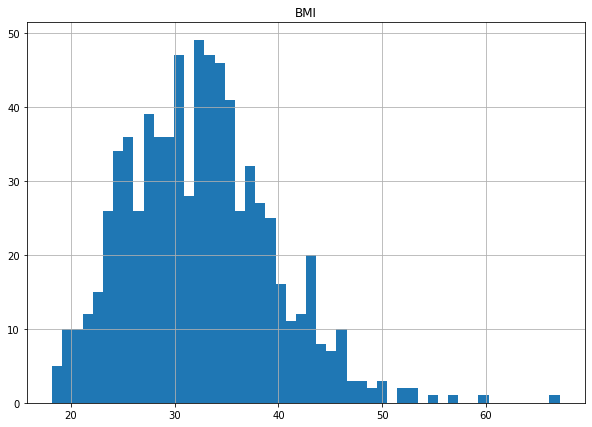

In [54]:
X.hist(column='BMI',bins=50,figsize=(10,7))

In [55]:
X['BMI'].mean()

32.455952380952375

array([[<AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

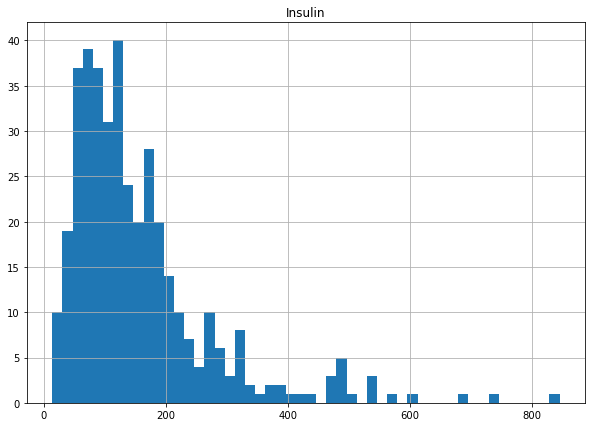

In [56]:
X.hist(column='Insulin',bins=50,figsize=(10,7))

### impute with median values

In [57]:
X['Insulin'].median()

125.0

In [58]:
X['Insulin'].max()

846.0